In [78]:
# Importando as bibliotecas necessarias
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch  
import numpy as np
import seaborn as sn
import pandas as pd

abalone = pd.read_csv("abalone.csv", sep=',')   # Leitura do .csv e armazenamento em um DataFrame

y = abalone['age']                # Estabelecendo dado alvo
x = abalone.drop(columns=['age', 'rings'])   # Dados básicos sem o alvo


### Análise exploratória e pré-processamento

In [79]:
# Tranforma a coluna 'sex' em numérica para o seu uso

abalone['sex'] = abalone['sex'].apply(lambda x: str(x).replace("M", "0"))
abalone['sex'] = abalone['sex'].apply(lambda x: str(x).replace("F", "1"))
abalone['sex'] = abalone['sex'].apply(lambda x: str(x).replace("I", "2"))
abalone['sex'] = abalone['sex'].astype(float)

x = abalone.drop(columns=['age', 'rings'])

Primeiramente farei uma **análise da correlação** entre as variáveis para considerar quais devo observar mais de perto e quais teoricamente são menos importantes para a variável alvo.

As variáveis que estão dentro da escala de 1 a 0,7 (+ ou -) e na tonalidade laranja no caso das positivas, e roxo escuro no caso das negativas, possuem uma forte correlação

<AxesSubplot: >

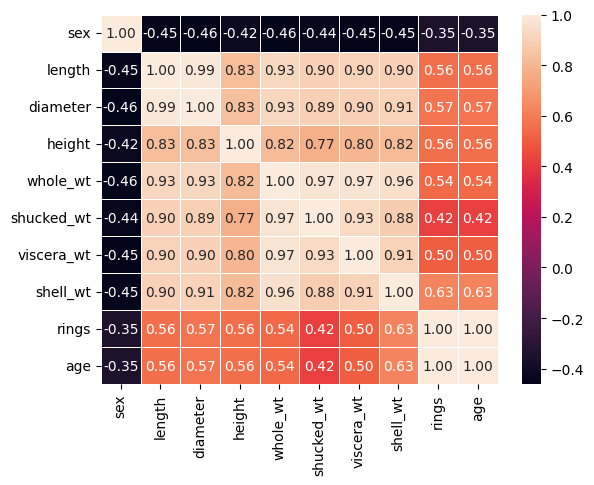

In [80]:
# Análise da correlação entre as variáveis

correlation = abalone.corr()
plot = sn.heatmap(correlation, annot=True, fmt=".2f", linewidths=.6)
plot

É possível perceber que a variável *rings* tem 100% de correlação com a variável alvo, o que já era esperado já que alvo = rings+1,5. Isso basicamente significa que eu nem preciso de uma IA para prever a variável *age* baseando-se nas outras variáveis como entrada porque basta olhar para a variável *rings* e adicionar 1,5. Contudo, vou retirar esse atributo para que a aplicação dos métodos fique mais real.

As demais variáveis apresentam correlação relativamente forte (entre 0,5 e 0,7), com exceção de *shucked_wt* e *sex* que tiveram as piores correlação possíveis, uma correlação média e fraca. Contudo, a segunda variável com maior correlação com a variável *age* é *shell_wt*. Por sua baixa correlação com o alvo, vou descartar a variável *sex* também.

Também dá pra ver que existem variáveis de entrada que são muito correlatas entre si, portanto, isso me permite excluir pelo menos uma delas, é o caso de (*whole_wt* e *shucked_wt*), (*whole_wt* e *viscera_wt*), (*whole_wt* e *shell_wt*) e (*diameter* e *lenght*). Dessa forma, eu aplicarei nesses grupos uma abordagem de redução de dimensionalidade, utilizarei uma seleção.

Para cada dupla de variáveis que citei eu vou descartar a que tem a menor correlação com o atributo alvo. Assim, ficam descartados os atributos: [**lenght, shucked_wt, viscera_wt e whole_wt**]

In [81]:
x = x.drop(columns=['length', 'shucked_wt', 'viscera_wt', 'whole_wt', 'sex'])

In [82]:
# Padronização do conjunto de dados de entrada. Acaba sendo uma parte
# importante do pré-processamento porque aumenta a acurácia de algoritmos como MLP

escala = StandardScaler()
escala.fit(x)                     # Calcula media e desvio-padrão para usar na padronização
x_norm = escala.transform(x)      # Evitando assim valores com grandes variações

In [83]:
# Separação de conjuntos treinamento e test com proporção 70-30 e aleatoriedade
# Fixando estado de aleatoriedade para garantir reprodutibilidade de resultados
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.30, \
                                      random_state=5, shuffle=True)

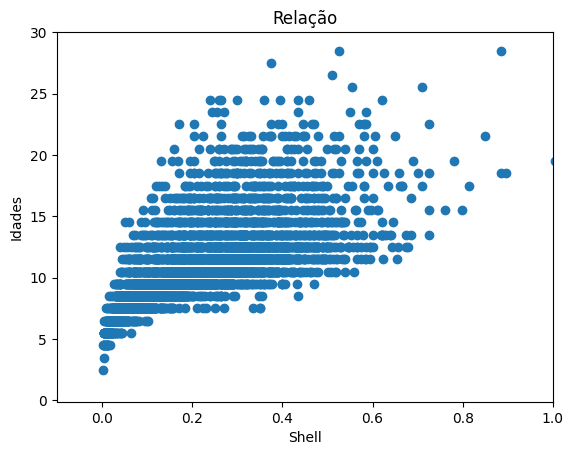

In [84]:
plt.scatter(abalone.shell_wt, abalone.age)
plt.title("Relação")
plt.ylabel("Idades")
plt.xlabel("Shell")

plt.axis([-0.1, 1, -0.1, 30])

plt.show()

Text(0, 0.5, 'Idades')

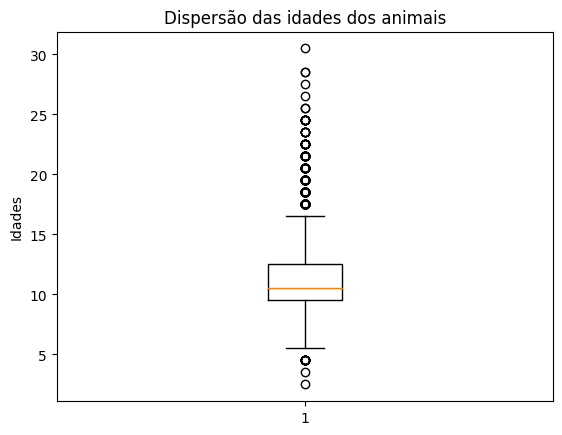

In [85]:
plt.boxplot(abalone["age"])

plt.title("Dispersão das idades dos animais")
plt.ylabel("Idades")

## Processamento

### MLP

In [86]:
# Criando meu Regressor de perceptrons de multicamada utilizando algoritmo Sthocastic Gradient Descent
# 3 perceptrons na única camada oculta que tem
# 1500 iterações, tolerância de 0.0000001, taxa de aprendizado 0.01 e função de ativação logistic

rna1 = MLPRegressor(solver="sgd" ,hidden_layer_sizes=(3,), max_iter=1500, tol=0.0000001, \
    learning_rate_init=0.01, activation="logistic", learning_rate="constant", verbose=True)

# Esse regressor é uma segunda versão do primeiro mas com a duas camadas ocultas, a primeira
# com 10 perceptrons e a segunda com 5
rna2 = MLPRegressor(solver="sgd" ,hidden_layer_sizes=(10, 5), max_iter=1500, tol=0.0000001, \
    learning_rate_init=0.01, activation="logistic", learning_rate="constant", verbose=True)

In [87]:
# Treino/Ajustamento
rna1.fit(x_train, y_train)
rna2.fit(x_train, y_train)

Iteration 1, loss = 37.12250791
Iteration 2, loss = 5.72873652
Iteration 3, loss = 3.47353879
Iteration 4, loss = 3.23856757
Iteration 5, loss = 3.17135813
Iteration 6, loss = 3.10551200
Iteration 7, loss = 3.08206764
Iteration 8, loss = 3.06018665
Iteration 9, loss = 3.04691614
Iteration 10, loss = 3.03513583
Iteration 11, loss = 3.02295000
Iteration 12, loss = 3.01480001
Iteration 13, loss = 3.00825234
Iteration 14, loss = 2.99949510
Iteration 15, loss = 2.98985454
Iteration 16, loss = 2.98275038
Iteration 17, loss = 2.97673410
Iteration 18, loss = 2.97042782
Iteration 19, loss = 2.96537596
Iteration 20, loss = 2.95934833
Iteration 21, loss = 2.95617035
Iteration 22, loss = 2.95368867
Iteration 23, loss = 2.94733317
Iteration 24, loss = 2.94092305
Iteration 25, loss = 2.93750037
Iteration 26, loss = 2.93167496
Iteration 27, loss = 2.92963600
Iteration 28, loss = 2.92281793
Iteration 29, loss = 2.92076493
Iteration 30, loss = 2.91538706
Iteration 31, loss = 2.91222891
Iteration 32, lo

MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.01, max_iter=1500, solver='sgd', tol=1e-07,
             verbose=True)

In [88]:
# Predições
Y_rna1_previsao = rna1.predict(x_test)
Y_rna2_previsao = rna2.predict(x_test)

In [89]:
# CÉLULA OPCIONAL  
# Esta célula faz um truncamento dos resultados, arredondando-os para que fiquem apenas
# com uma casa decimal. Assim ficam exatamente iguais à formatação do conjunto de labels

for i in range(0, len(Y_rna1_previsao)):
    Y_rna1_previsao[i] = round(Y_rna1_previsao[i], 1)

for i in range(0, len(Y_rna2_previsao)):
    Y_rna2_previsao[i] = round(Y_rna2_previsao[i], 1)

### Árvore de decisão

In [90]:
# Criando a árvore de decisão com profundidade máxima de 4 e um mínimo de 2 amostras
# em cada nó filho para um ponto de divisão ser condiderado
dt1 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, random_state=5)

# Criando a árvore de decisão com profundidade máxima de 6 e um mínimo de 2 amostras
# em cada nó filho para um ponto de divisão ser condiderado
dt2 = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, random_state=5)

In [91]:
# Treino/Ajustamento
dt1.fit(x_train, y_train)
dt2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, random_state=5)

In [92]:
# Predições
Y_dt_previsao1 = dt1.predict(x_test)
Y_dt_previsao2 = dt2.predict(x_test)

## Pós-processamento

In [93]:
r2_rna1 = r2_score(y_test, Y_rna1_previsao)
r2_rna2 = r2_score(y_test, Y_rna2_previsao)
r2_dt1 = r2_score(y_test, Y_dt_previsao1)
r2_dt2 = r2_score(y_test, Y_dt_previsao2)
print("R2 da RNA1: ",r2_rna1)
print("R2 da RNA2: ",r2_rna2)
print("R2 DecisionTree1: ",r2_dt1)
print("R2 DecisionTree2: ",r2_dt2)

R2 da RNA1:  0.44307494855140284
R2 da RNA2:  0.4416459705419187
R2 DecisionTree1:  0.3763243128285205
R2 DecisionTree2:  0.4000550822488347


Eu utilizei a métrica R² para as comparações de desempenho dos modelos e algoritmos; essa métrica varia de 0 a 1 e está relacionada à variabilidade dos dados de resposta em torno de sua média, quanto mais próximo de 1 melhor será o modelo. Nota-se que entre os dois tipos de algoritmo, a rede neural se deu melhor, já em se tratando de uma análise entre os modelos regressores de cada algoritmo:para esse problema um modelo de perceptrons de multicamada com duas camadas ocultas e mais perceptrons em cada camada funciona melhor do que o primeiro regressor com apenas uma camada oculta de 3 perceptrons, já na árvore de decisão a versão com maior profundidade máxima (6 níveis na arvore) se saiu melhor.

# Questão 2

### K-Means

É bom lembrar que o K-Means é um algoritmo de aprendizado não-supervisionado e por isso não usaremos o conjunto de dados alvo para sua execução.

In [94]:
# Cria dois objetos clusterizadores KMeans e fixa random_state para garantir a reprodutibilidade
# do experimento

clstK3 = KMeans(n_clusters=3, random_state=5, max_iter=1500)   # K = 3
clstK5 = KMeans(n_clusters=5, random_state=5, max_iter=1500)   # K = 5

In [95]:
# Execução do algoritmo Kmeans

clstK3.fit(x)
clstK5.fit(x)

KMeans(max_iter=1500, n_clusters=5, random_state=5)

Visualizando os centros dos clusters:

In [96]:
clstK3.cluster_centers_

array([[0.51663565, 0.18265426, 0.42531244],
       [0.28859171, 0.0959056 , 0.08719455],
       [0.43184026, 0.14641392, 0.24270804]])

In [97]:
clstK5.cluster_centers_

array([[0.54585635, 0.19584254, 0.51904834],
       [0.24074746, 0.08041364, 0.05355878],
       [0.43814424, 0.14881266, 0.25040809],
       [0.36035782, 0.11993798, 0.14583969],
       [0.49353879, 0.17169501, 0.35626461]])

In [98]:
# Predição: dados os dados de entrada, a quais clusters eles pertencem?

clusters_KM5 = clstK5.predict(x)
clusters_KM3 = clstK3.predict(x)

Como métrica de avaliação do melhor número de grupos eu vou escolher a 
**inércia**, que se refere ao quadrado das distancias entre cada ponto e o centro de seu
cluster. Sendo assim, quanto menor a inércia melhor a clusterização pois significa
que os pontos de dados ficaram mais próximos do centro do cluster, mais agrupados. 

In [99]:
print(clusters_KM3)

[1 1 2 ... 2 2 0]


In [100]:
print("A inercia de K=3 é: ", clstK3.inertia_)
print("A inercia de K=5 é: ", clstK5.inertia_)

A inercia de K=3 é:  27.711219537801238
A inercia de K=5 é:  13.606290502749815


Apesar de ambas as inércias serem ruins, podemos perceber que K=3 ainda é melhor do que K=5. O K-Means funciona cada vez pior a medida que o número de dimensões dos dados crescem, o que implica em inércias maiores, contudo o tratamento dos dados auxiliou de modo significativo no aumento da eficiência dos dois modos de agrupamento.

### Hierárquico

Dendrograma:

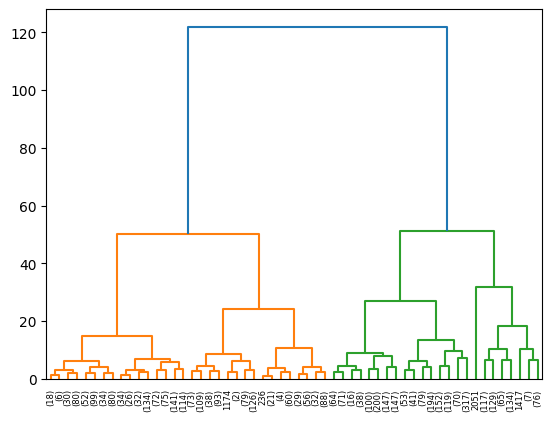

In [101]:
# Delineamento do dendrograma para avaliação visual dos dados e das possíveis conexões
# nas clusterizações

dendrograma = sch.dendrogram(sch.linkage(x_norm, method='ward'), truncate_mode='level', p=5)

In [102]:
# Criando o clusterizador com método hierárquico aglomerativo

hc3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [103]:
# Treinamento e predição doas algoritmos hierárquicos

clusters_hc3 = hc3.fit_predict(x)
clusters_hc5 = hc5.fit_predict(x)

In [104]:
print('Silhouette score do Hierarquico com 3 grupos: ', silhouette_score(x, clusters_hc3, metric='euclidean'))
print('Silhouette score do Hierarquico com 5 grupos: ', silhouette_score(x, clusters_hc5, metric='euclidean'))
print('Silhouette score do K-Means com 3 grupos: ', silhouette_score(x, clusters_KM3, metric='euclidean'))
print('Silhouette score do K-Means com 5 grupos: ', silhouette_score(x, clusters_KM5, metric='euclidean'))

Silhouette score do Hierarquico com 3 grupos:  0.456369808219022
Silhouette score do Hierarquico com 5 grupos:  0.4217773147954253
Silhouette score do K-Means com 3 grupos:  0.48295939747724653
Silhouette score do K-Means com 5 grupos:  0.45315796243476014


Escolhi o **Silhouette Score** como métrica para avaliação e comparação dos dois algoritmos de clusterização. Essa métrica varia de -1 a 1 e quanto mais próximo de 1 melhor. Sendo assim percebe-se que em ambos os algoritmos, 3 grupos é melhor do que 5.